<a href="https://colab.research.google.com/github/aksaksham108/DiabetesPredictionModel/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler #standarize the data
from sklearn.model_selection import train_test_split #separtin of training and testing data
from sklearn import svm #training model
from sklearn.metrics import accuracy_score #evaluation

In [5]:
# loading the diabetes dataset into pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes_dataset.csv')

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# pd.read_csv?

In [8]:
diabetes_dataset.fillna(diabetes_dataset.mean(numeric_only=True), inplace=True)  # Fill missing values with mean
# diabetes_dataset.dropna(inplace=True)  # Drop missing values

In [25]:
# first 5 rows
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


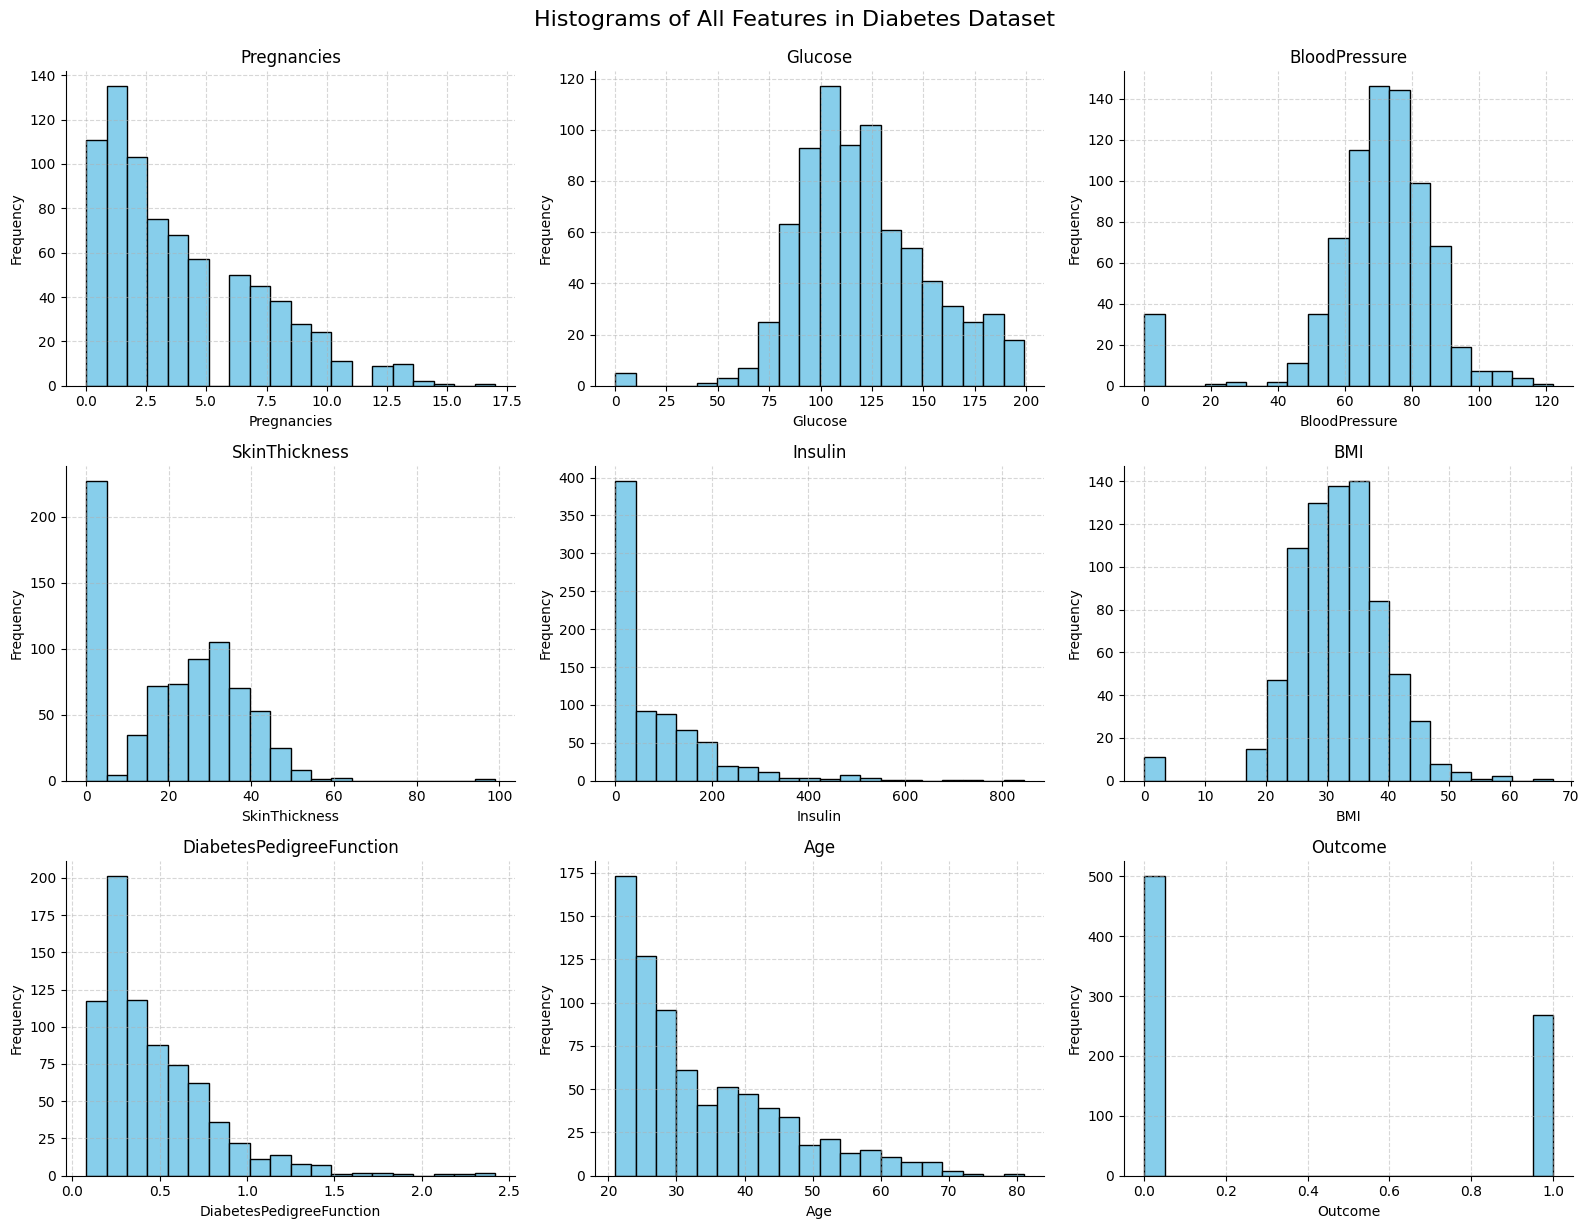

In [24]:
import matplotlib.pyplot as plt

# Define number of features
features = diabetes_dataset.columns

# Set figure size based on number of plots
plt.figure(figsize=(16, 12))

# Plot each feature in a subplot
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)  # 3x3 grid for 9 columns
    plt.hist(diabetes_dataset[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.suptitle('Histograms of All Features in Diabetes Dataset', fontsize=16, y=1.02)
plt.show()


In [16]:
# from matplotlib import pyplot as plt
# _df_0['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
# from matplotlib import pyplot as plt
# _df_85['Glucose'].plot(kind='hist', bins=20, title='Glucose')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# from matplotlib import pyplot as plt
# _df_86['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# from matplotlib import pyplot as plt
# _df_87['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness')
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
# Last 5 rows
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [19]:
from matplotlib import pyplot as plt
_df_100['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_df_100' is not defined

In [ ]:
from matplotlib import pyplot as plt
_df_101['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_102['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_103['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Summary of dataset
diabetes_dataset.info()

In [ ]:
#statistical summary
diabetes_dataset.describe()

In [ ]:
from matplotlib import pyplot as plt
_df_120['Pregnancies'].plot(kind='line', figsize=(8, 4), title='Pregnancies')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_121['Glucose'].plot(kind='line', figsize=(8, 4), title='Glucose')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_122['BloodPressure'].plot(kind='line', figsize=(8, 4), title='BloodPressure')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_123['SkinThickness'].plot(kind='line', figsize=(8, 4), title='SkinThickness')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#tells us the number of rows and columns
diabetes_dataset.shape

In [ ]:
diabetes_dataset.sort_values('Insulin', ascending=False)  # Sort by column

In [ ]:
from matplotlib import pyplot as plt
_df_128.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_129.plot(kind='scatter', x='Glucose', y='BloodPressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_130.plot(kind='scatter', x='BloodPressure', y='SkinThickness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_131.plot(kind='scatter', x='SkinThickness', y='Insulin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
diabetes_dataset['Outcome'].value_counts()

0 --> NON-DIABETIC

1 --> DIABETIC

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

In [ ]:
# separating the labels and data
X = diabetes_dataset.drop(columns = 'Outcome', axis=1) # axis=0 (row) and axis=1 (column)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

In [ ]:
print(Y)

Data Standardization --> It means the data is in range from (0 to 1) or (-1 to 1).

In [ ]:
scaler = StandardScaler()

In [ ]:
standardized_data = scaler.fit_transform(X)

In [ ]:
X= standardized_data
Y = diabetes_dataset['Outcome']

Train Test Split

In [ ]:
print(X)
print(Y)

In [ ]:
# test size means 20 % for testing and rest 80% for training the model.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

Training the Model

In [ ]:
# SVC - Support Vector Classifier (function of svm module of sklearn library)
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector machine classifier(model)
classifier.fit(X_train, Y_train)

Model Evaluation

Accuracy Store

In [ ]:
#accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy of the training data: ',training_data_accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, X_train_prediction)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Training Data)')
plt.colorbar()

# Tick labels
classes = ['Non-Diabetic', 'Diabetic']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add numbers inside the squares
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > cm.max()/2 else 'black')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [11]:
#accuracy score on the testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

NameError: name 'classifier' is not defined

In [ ]:
print('Accuracy of the testing data: ',testing_data_accuracy)

Making a Predicting System

In [ ]:
# example for non-diabetic
input_data =  (9,182,44,2,7,36.7,2.143,47)

# example for diabetic
# input_data =  (14,106,54,41,708,45.6,1.026,21)

# chainging input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

In [ ]:
# Ensure input data is a NumPy array
input_data = np.asarray(input_data)

# Calculate average feature values for diabetic and non-diabetic (excluding 'Outcome')
diabetic_avg = diabetes_dataset[diabetes_dataset['Outcome'] == 1].drop(columns='Outcome').mean()
non_diabetic_avg = diabetes_dataset[diabetes_dataset['Outcome'] == 0].drop(columns='Outcome').mean()

# Feature names (without Outcome)
features = diabetes_dataset.columns[:-1]

# Prepare x-axis positions
x = np.arange(len(features))
width = 0.25

# Plot the comparison
plt.figure(figsize=(14, 6))
plt.bar(x - width, non_diabetic_avg, width, label='Non-Diabetic Avg', color='green', alpha=0.6)
plt.bar(x, diabetic_avg, width, label='Diabetic Avg', color='red', alpha=0.6)
plt.bar(x + width, input_data, width, label='Input Person', color='blue', alpha=0.6)

plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Health Profile Comparison')
plt.xticks(x, features, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()